<h1>Twitter Sentimental Analysis</h1>


In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from jupyterthemes import jtplot

In [4]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
#Setting the style of notebook to be monokai theme
#this line of code is important to ensure that we are able to see the x and y coordinates clearly
#if you dont run this code line, you will notice the xlabel and ylabel on any plot is black


<h6>Task 1 Import Libraries and dataset</h6>

In [5]:
tweets_df=pd.read_csv("twitter.csv")

In [6]:
tweets_df
# 0 in case of postive tweet
# 1 in the case of negative tweet

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [9]:
tweets_df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [73]:
tweets_df = tweets_df.drop(["id"], axis=1) #drop id column from dataset

tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<h6> Task 2 Exploring dataset</h6>

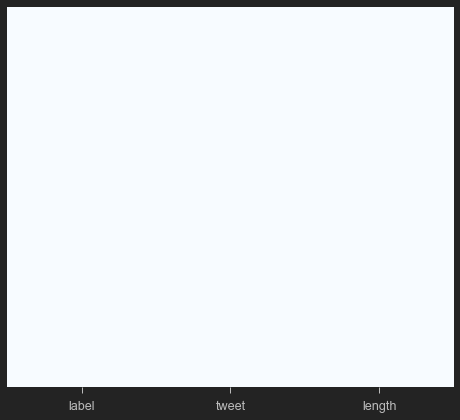

In [74]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False,cmap ="Blues")

#every things looks white it means there is no null value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC92306688>,
      dtype=object)

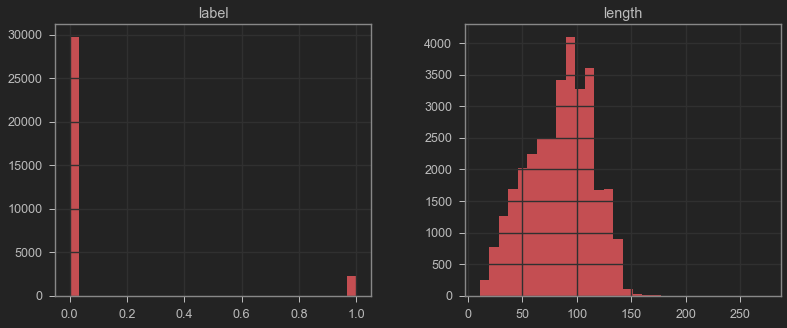

In [75]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [76]:
#30000 positive tweets and less than 5000 negative tweets

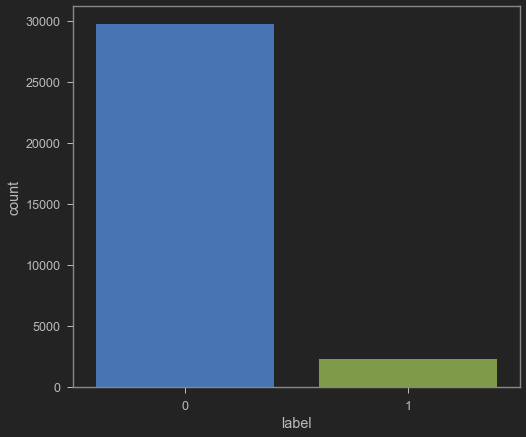

In [77]:
sns.countplot(tweets_df['label'], label ='count')

In [78]:
#lets get the length of messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [79]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


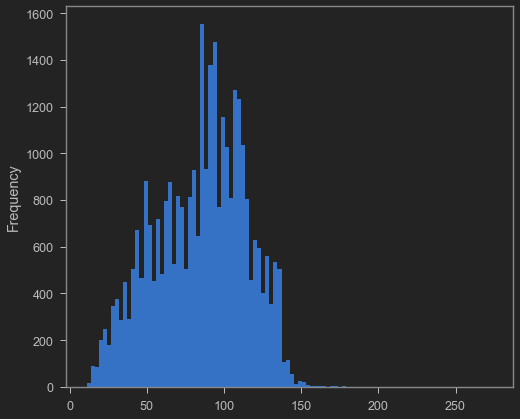

In [80]:
tweets_df['length'].plot(bins = 100, kind ='hist')

In [81]:
#max tweet is of length 84

In [82]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [83]:
#Lets see the shortest length tweet
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [84]:
# lets see the average length tweets
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [122]:
<h6>Task 3 divinding tweets into positive and negative tweets</h6>

SyntaxError: invalid syntax (<ipython-input-122-31b292876e5c>, line 1)

In [86]:
positive = tweets_df[tweets_df['label'] == 0]

In [87]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [88]:
negative = tweets_df[tweets_df['label'] == 1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


<h6>Task 4 PLot Wordcloud</h6>

In [89]:
# creating one big string of all the sentences 
sentences = tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [90]:
len(sentences)

31962

In [91]:
sentences_as_one_string="".join(sentences)

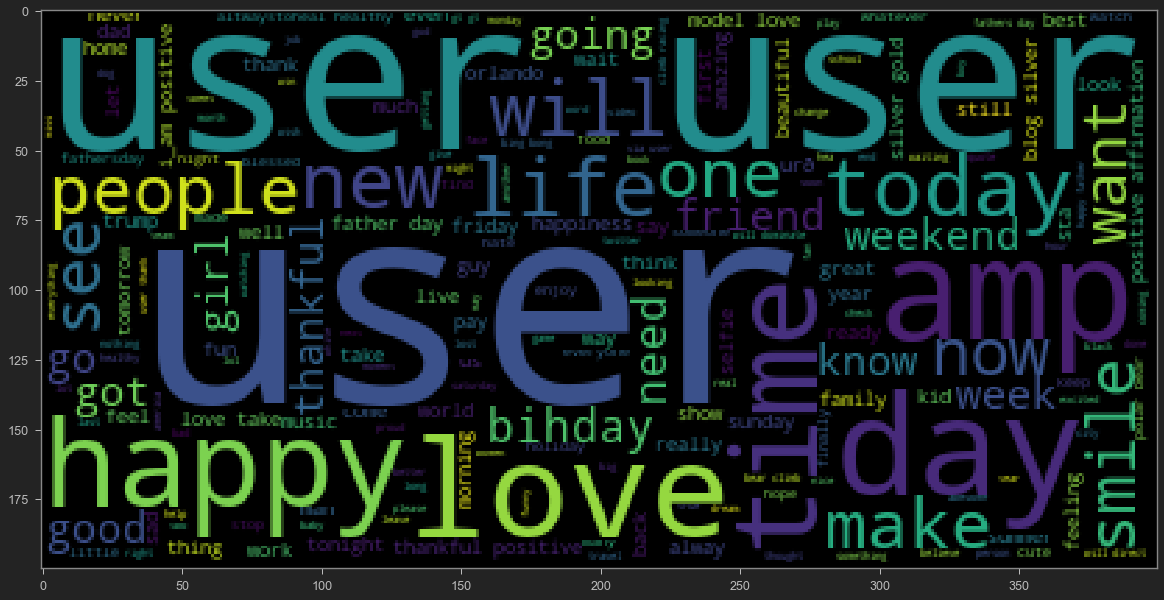

In [92]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

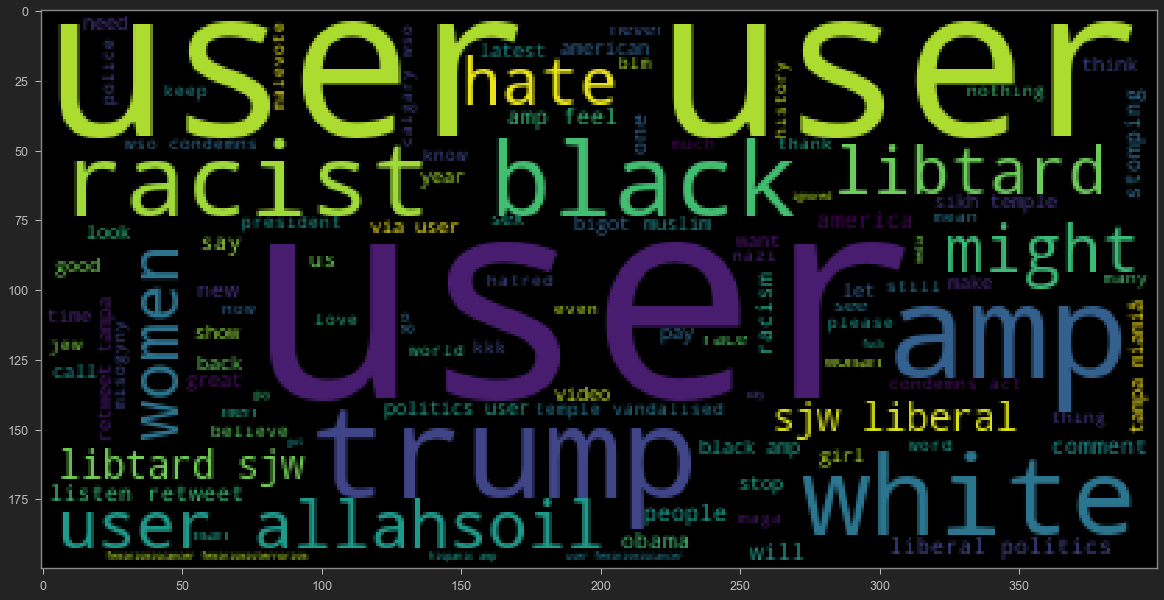

In [93]:
# creating world cloud for negative list
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string="".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

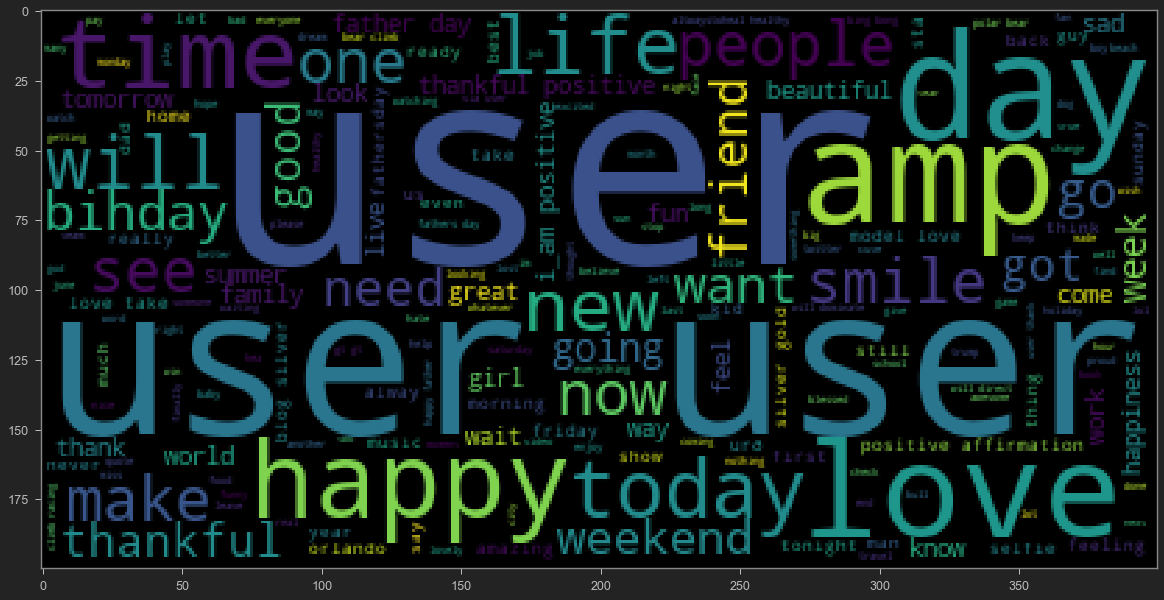

In [94]:
# creating world cloud for positive list
positive_list = positive['tweet'].tolist()
positive_sentences_as_one_string="".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

<h6> Task 5 Data cleaning remove Punctuation from text</h6>

In [95]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
test = 'Good morining beautiful people :)... I am having fun learning machine learning and artificial intelligence'

In [97]:
test_punc_remove = [char for char in test if char not in string.punctuation]

In [98]:
test_punc_remove

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'i',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'a',
 'r',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'i',
 'n',
 't',
 'e',
 'l',
 'l',
 'i',
 'g',
 'e',
 'n',
 'c',
 'e']

In [99]:
#join the character again to form string
test_punc_removed_join = ''.join(test_punc_remove)
test_punc_removed_join

'Good morining beautiful people  I am having fun learning machine learning and artificial intelligence'

In [100]:
# removing punctuationa and joining it by another meathod
test_punc_remove=[]
for char in test:
    if char not in string.punctuation:
        test_punc_remove.append(char)
        
test_punc_removed_join = ''.join(test_punc_remove)
test_punc_removed_join

'Good morining beautiful people  I am having fun learning machine learning and artificial intelligence'

<h6>Task 6 Remove stop word</h6>

In [101]:
import nltk #natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babybomber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
# we have to download stopwords package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
test_word_remove_join_clean =[ word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
test_word_remove_join_clean

['Good',
 'morining',
 'beautiful',
 'people',
 'fun',
 'learning',
 'machine',
 'learning',
 'artificial',
 'intelligence']

<h6>Task 7 Perform tokenization and count vectorization</h6>

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
               
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [105]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [106]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [107]:
#practice test
practice_test = ['Hello world','hello hello world','hello world world world']
vectorizer_practice_test = CountVectorizer()
X_practice_test=vectorizer_practice_test.fit_transform(practice_test)
print(vectorizer.get_feature_names)
print(X_practice_test.toarray())

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>
[[1 1]
 [2 1]
 [1 3]]


<h6>Task 8 Creating pipeline to remove punctuations, stopwords and perform count vectorization</h6>

In [108]:
#lets define a pipe line to clean up all the elements
#the pipeline performs the following (1)Remove punctuation (2)Remove stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean
    

In [109]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [110]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [111]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [113]:
tweets_countvectorizer.shape #31000 rows corresponding to 41000 unique words 

(31962, 47386)

In [114]:
x=tweets_countvectorizer
y=tweets_df['label']

<h6>Understand the theory of naive based algorithm</h6>

<h6>Task 9 Train a naive base classifier model</h6>

In [115]:
x.shape

(31962, 47386)

In [116]:
y.shape

(31962,)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [118]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<h6>task 10 Trained model perfromance</h6>

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

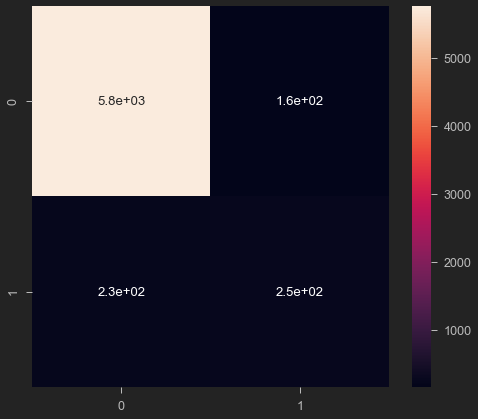

In [120]:
#Predicting the test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True)

In [121]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5917
           1       0.61      0.52      0.57       476

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393

